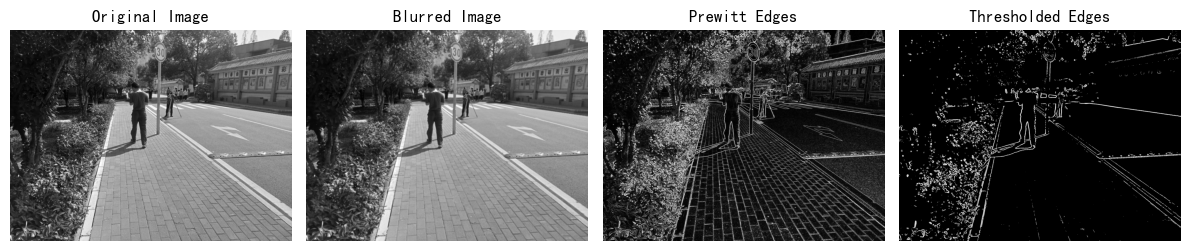

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
save_dir = r"C:\Users\97567\Pictures\tpic"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
def prewitt_operator(image, use_diagonal=False):
    # 定义标准Prewitt算子
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

    # 定义对角线Prewitt算子（如果需要）
    if use_diagonal:
        kernel_d1 = np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]], dtype=np.float32)
        kernel_d2 = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]], dtype=np.float32)

    # 对图像进行卷积操作
    grad_x = cv2.filter2D(image, cv2.CV_32F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_32F, kernel_y)

    if use_diagonal:
        grad_d1 = cv2.filter2D(image, cv2.CV_32F, kernel_d1)
        grad_d2 = cv2.filter2D(image, cv2.CV_32F, kernel_d2)
        magnitude = np.sqrt(grad_x**2 + grad_y**2 + grad_d1**2 + grad_d2**2)
    else:
        magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # 将梯度幅值转换为8位无符号整数
    magnitude = cv2.convertScaleAbs(magnitude)

    return magnitude

def apply_threshold(image, threshold_method=cv2.THRESH_BINARY, threshold_value=100):
    _, binary_image = cv2.threshold(image, threshold_value, 255, threshold_method)
    return binary_image

# 读取并转换为灰度图像
image_path = r"C:\Users\97567\Pictures\35a0d42cf448ff17f1085430f86bed72.jpg"  # 替换为你的图像路径
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 可选：先进行高斯模糊以减少噪声
blurred_image = cv2.GaussianBlur(image, (5, 5), 10)

# 应用Prewitt算子
prewitt_1edges = prewitt_operator(image, use_diagonal=False)
prewitt_2edges = prewitt_operator(image, use_diagonal=True)
blurred_prewitt_edges = prewitt_operator(blurred_image, use_diagonal=True)
# 阈值化处理
thresholded_edges = apply_threshold(blurred_prewitt_edges, threshold_method=cv2.THRESH_BINARY, threshold_value=127)


Canny = cv2.Canny(blurred_image, 50, 150)

   # 保存图像
original_image_save_path = os.path.join(save_dir, 'original_image.png')
blurred_prewitt_image_save_path = os.path.join(save_dir, 'blurred_prewitt_image.png')
blurred_image_save_path = os.path.join(save_dir, 'blurred_image.png')
prewitt_edges_save_path = os.path.join(save_dir, 'prewitt_edges.png')
prewitt_2edges_save_path = os.path.join(save_dir, 'prewitt_2edges.png')
thresholded_edges_save_path = os.path.join(save_dir, 'thresholded_edges.png')
canny_save_path = os.path.join(save_dir, 'canny.png')

cv2.imwrite(canny_save_path, Canny)
cv2.imwrite(original_image_save_path, image)
cv2.imwrite(blurred_prewitt_image_save_path, blurred_prewitt_edges)
cv2.imwrite(blurred_image_save_path, blurred_image)
cv2.imwrite(prewitt_edges_save_path, prewitt_1edges)
cv2.imwrite(prewitt_2edges_save_path, prewitt_2edges)
cv2.imwrite(thresholded_edges_save_path, thresholded_edges)
# 显示结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Prewitt Edges')
plt.imshow(prewitt_1edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Thresholded Edges')
plt.imshow(thresholded_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
